# Esport Industry Growth for the Past 10 Years (2013-2022)

## Introduction
Electronic sports, also known as Esports, are competitive video games played in a highly organized and professional setting. Like sports competitions in general, in Esports there are professional teams that have their best players who will participate in leagues or tournaments. Player compete in multiplayer matches, either individually or as part of a team, for cash prizes and other rewards.
Esports are a global phenomenon, with tournaments and leagues held all over the world. Lately, Esports are becoming increasingly popular, with millions of fans watching matches online and in person. The industry is also generating billions of dollars in revenue, making it a major economic force.

The main goals of this project is to discover insight and patterns by looking how earnings have chnaged over time, the different type of genre and game being played. To achieve the goals, this project  will perform an **Exploratory Data Analysis (EDA)** on the **Esports Industry**.

Source of dataset : [EsportsEarnings.com](https://www.esportsearnings.com/)



## Step 1: Imports and Reading Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
df_games = pd.read_csv('/kaggle/input/esports-earnings/GeneralEsportData.csv')
df_earnings = pd.read_csv('/kaggle/input/esports-earnings/HistoricalEsportData.csv')

## Step 2: Data Understanding
* Dataframe ```shape```
* ```head``` and ```tail```
* ```dtypes``` 
* ```describe```


In [3]:
df_games.shape

(647, 8)

In [4]:
df_earnings.shape

(8891, 5)

In [5]:
df_games.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,493845.74,363105.40,0.735261,453,250
1,Age of Empires II,1999,Strategy,3220622.76,1131355.02,0.351285,1968,1583
2,Age of Empires III,2005,Strategy,115418.65,41800.00,0.362160,165,155
3,Age of Empires IV,2021,Strategy,977755.71,409117.93,0.418426,539,319
4,Age of Empires Online,2011,Strategy,9706.56,775.00,0.079843,44,49


In [6]:
df_earnings.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


This datasets contain two table
1. ```df_games``` -> contain general information about games, it has 7 columns
    * Game: The name of the game
    * ReleaseDate: The date the game released 
    * Genre: The genre of the game 
    * TotalEarnings: The total earnings of the game in USD
    * OnlineEarnings: The total earnings of the game through online in USD
    * TotalPlayers: The total players of the game
    * TotalTournaments: the total tournaments held by the game
2. ```df_earnings``` -> contain information about Esports 
    * Date: The date when tournaments held
    * Game: The name of the game played in the tournaments
    * Earnings: The earnings from the tournaments
    * Players: The player who participate in the tournaments
    * Tournaments: The number of tournaments held

In [7]:
print(df_games.info())
print(df_earnings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              647 non-null    object 
 1   ReleaseDate       647 non-null    int64  
 2   Genre             647 non-null    object 
 3   TotalEarnings     647 non-null    float64
 4   OfflineEarnings   647 non-null    float64
 5   PercentOffline    581 non-null    float64
 6   TotalPlayers      647 non-null    int64  
 7   TotalTournaments  647 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8891 non-null   object 
 1   Game         8891 non-null   object 
 2   Earnings     8891 non-null   float64
 3   Players      8891 non-null   int64  


In [8]:
df_games.describe()

,ReleaseDate,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
count,647.000000,6.470000e+02,6.470000e+02,581.000000,647.000000,647.000000
mean,2012.525502,2.501950e+06,1.758193e+06,0.656465,224.132921,92.941267
std,7.425932,1.746404e+07,1.372866e+07,0.414826,952.839342,473.238065
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,0.121071,4.000000,1.000000
50%,2015.000000,3.600000e+04,1.346328e+04,0.906896,21.000000,5.000000
75%,2018.000000,2.599194e+05,1.701000e+05,1.000000,98.000000,27.000000
max,2023.000000,3.355222e+08,2.978701e+08,1.000000,16069.000000,7190.000000


In [9]:
df_earnings.describe()

,Earnings,Players,Tournaments
count,8.891000e+03,8891.000000,8891.000000
mean,1.751357e+05,59.057361,6.601057
std,1.016232e+06,128.634142,11.995499
min,0.000000e+00,0.000000,1.000000
25%,1.035000e+03,6.000000,1.000000
50%,1.000000e+04,16.000000,2.000000
75%,6.896561e+04,50.000000,6.000000
max,4.013865e+07,1719.000000,172.000000


## Step 3: Data Preparation: Data Wrangling and Cleaning
* Merge the data
* Rename
* Check missing value
* Check duplicate value

First, I want to extract year of tournament was held from ```df_earning``` table by adding new columns for further analysis


In [10]:
# Extracting year of tournament was held
df_earnings['Year'] = pd.DatetimeIndex(df_earnings["Date"]).year
print(df_earnings.head())

         Date        Game  Earnings  Players  Tournaments  Year
0  1998-01-01  QuakeWorld   15000.0        8            1  1998
1  1998-05-01    Quake II   14600.0        4            1  1998
2  1998-05-01  QuakeWorld     300.0        3            1  1998
3  1998-07-01    Quake II    6500.0        4            1  1998
4  1998-11-01    Quake II   36600.0       13            2  1998


Now, let's combine it

In [11]:
# Merge 2 datasets into one
df_esports = df_earnings.merge(df_games[['Game','Genre','ReleaseDate']], on = 'Game')
print(df_esports.head())

         Date        Game  Earnings  Players  Tournaments  Year  \
0  1998-01-01  QuakeWorld  15000.00        8            1  1998   
1  1998-05-01  QuakeWorld    300.00        3            1  1998   
2  1998-11-01  QuakeWorld  22000.00        0            1  1998   
3  2001-07-01  QuakeWorld  15000.00        8            1  2001   
4  2008-11-01  QuakeWorld   2775.07        0            1  2008   

                  Genre  ReleaseDate  
0  First-Person Shooter         1996  
1  First-Person Shooter         1996  
2  First-Person Shooter         1996  
3  First-Person Shooter         1996  
4  First-Person Shooter         1996  


In [12]:
# Check all of genre of esports
df_esports.Genre.unique()

array(['First-Person Shooter', 'Strategy', 'Fighting Game', 'Sports',
       'Racing', 'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Third-Person Shooter', 'Music / Rhythm Game',
       'Collectible Card Game', 'Puzzle Game', 'Battle Royale'],
      dtype=object)

In [13]:
# Simplified the name by renaming
df_esports.Genre.replace(
    {
        'First-Person Shooter' : 'FPS',
        'Multiplayer Online Battle Arena' : 'MOBA',
        'Role-Playing Game' : 'RPG',
        'Third-Person Shooter' : 'TPS'
    }, inplace = True
)

df_esports.Game.replace({"Counter-Strike: Global Offensive": 'CS:GO',
                         "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG Mobile',
                         "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
                         "Arena of Valor": 'AoV',
                         "League of Legends": 'LoL'
                         }, inplace = True)

In [14]:
# Check missing value
df_esports.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
Year           0
Genre          0
ReleaseDate    0
dtype: int64

In [15]:
# Check duplicate value
df_esports.loc[df_esports.duplicated()]

,Date,Game,Earnings,Players,Tournaments,Year,Genre,ReleaseDate
2529,2009-03-01,Resistance 2,50400.0,194,1,2009,FPS,2008
7196,2018-04-01,Zula,100000.0,20,1,2018,FPS,2015


In [16]:
# Remove duplicate value
df_esports = df_esports.loc[~df_esports.duplicated(subset=['Date','Game','Earnings'])].reset_index(drop=True).copy()

In [17]:
df_esports.shape

(8891, 8)

I want to filter out rows that have 0 value

In [18]:
# filtering rows that have 0 value
df_esports = df_esports.loc[(df_esports['Earnings'] > 0) & (df_esports['Players'] > 0)].copy()

## Step 4: Exploratory Data Analysis (EDA)

I try to find insights and trends in the esports industry by analyzing earnings, tournaments, games, and genres. Those insights will be valuable and provide a more profound understanding of the Esports Industry

### 1. Top Earnings by Game All Times

First, Let's see Top Earnings (in Million USD) by Games All Times

In [19]:
# Calculating earnings
topgames = df_esports.loc[df_esports.Earnings > 0].copy()
topgames = topgames.groupby(['Game', 'ReleaseDate', 'Genre'])['Earnings'].sum().reset_index()
# Converting into Million USD
topgames['Earnings'] = round(topgames['Earnings']/1000000)
topgames = topgames.sort_values('Earnings', ascending=False, ignore_index=True)

print(topgames.head(10))

                Game  ReleaseDate          Genre  Earnings
0             Dota 2         2013           MOBA     319.0
1           Fortnite         2017  Battle Royale     159.0
2              CS:GO         2012            FPS     155.0
3                LoL         2009           MOBA     102.0
4                AoV         2015           MOBA      83.0
5        PUBG Mobile         2017  Battle Royale      67.0
6               PUBG         2017  Battle Royale      54.0
7       StarCraft II         2010       Strategy      39.0
8  Rainbow Six Siege         2015            FPS      37.0
9          Overwatch         2016            FPS      35.0


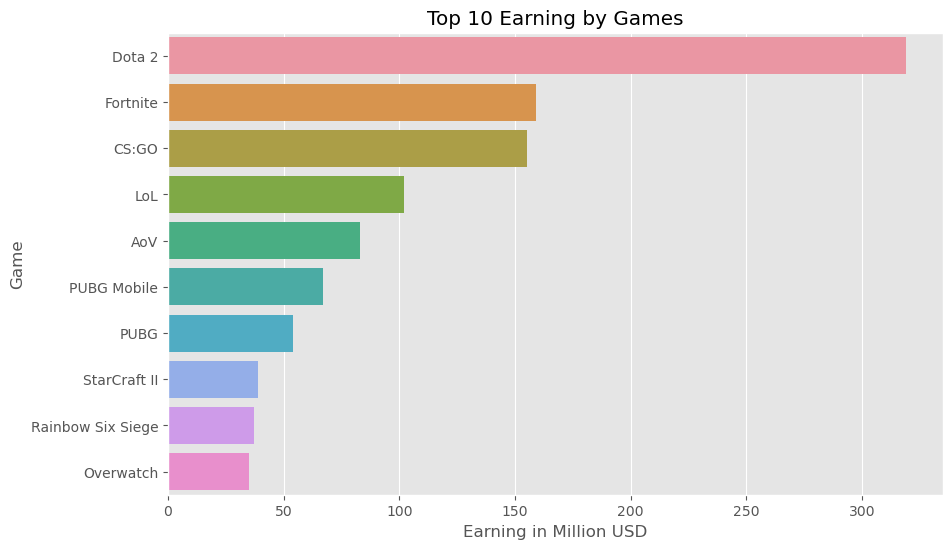

In [20]:
# Making a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = 'Earnings',
            y = 'Game',
            data = topgames.head(10),)
plt.xlabel('Earning in Million USD')
plt.title('Top 10 Earning by Games')
plt.show()

The graph shows Top 10 Earning by Games. It shows that **Dota 2** has the most Earnings with total prizepool of **$319M**. This game was released back in 2013. <br>
The second game on the list is **Fortnite**, what's the most interesting about **Fortnite** is that it was just released in 2017 and its tournaments have total prizepool of **$159M** surpassing **CS:GO** (Counter-Strike: Global Offensive) and **LoL** (League of Legends) which older than Fortnite.

### 2. Top Genre Earnings All Times

Now, let's see what genre that earn lots of money using pie chart 

In [21]:
# Calculate the sum of earnings for each genre
genre_counts = topgames.groupby('Genre')['Earnings'].sum()
sorted_genres = genre_counts.sort_values(ascending=False)
top_genres = sorted_genres[:3]
other_genres = sorted_genres[3:].sum()

# Create a new series (combining Top 4 genres & other genres)
mod_genre_counts = pd.concat([top_genres, pd.Series([other_genres], index=['Other'])])

print(mod_genre_counts)

MOBA             565.0
FPS              387.0
Battle Royale    315.0
Other            270.0
dtype: float64


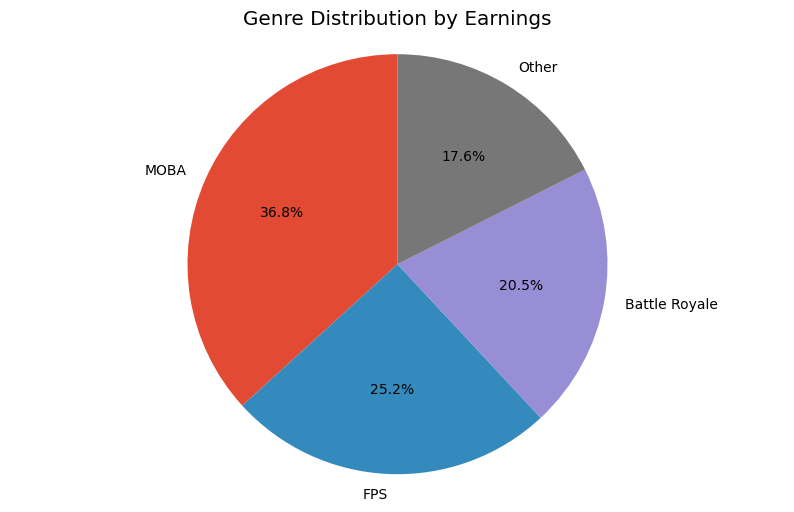

In [22]:
# Making a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(mod_genre_counts, labels=mod_genre_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title('Genre Distribution by Earnings')
plt.show()

The genre that has most earnings in total is **MOBA** (Multiplayer Online Battle Arena), generating a total of $565M which is 36.8% of earnings in Esports Industry. As we seen earlier, there are three games that have MOBA genre, namely Dota 2, League of Legends, and Arena of Valor. <br>

The second is **FPS** with $387M which is 25.2% of earnings in Esports Industry. There are also three popular FPS games, namely Counter-Strike: Global Offensive, Rainbow Six Siege, and Overwatch. <br>

The third genre that generating lots of earnings is **Battle Royale** with $315M which is 20.5% of earnings in Esports Industry. Games that have made lots of contribution in this genre are filled by games that haven't been that long ago, namely Fortnite, PUBG, and PUBG Mobile. <br>

There is a correlation between genre popularity and earnings. Almost all the game in the top 10 earning by games are in the top 3 most popular genre.

### 3. Total Tournament Held in the Past 10 Years (2013-2022)
I want to focus in the past 10 years. let's see total tournament was held in the past 10 years

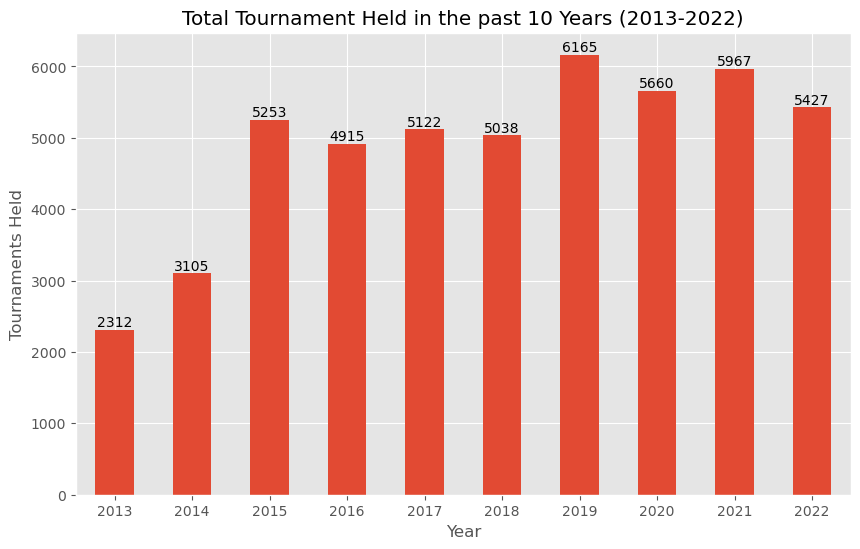

In [23]:
# Filtering the data for tournament held in 2013-2022
yearly_tournament_total = df_esports[(df_esports['Tournaments'] > 0) & 
                                     (df_esports['Year'] >= 2013) &
                                     (df_esports['Year'] <= 2022)].copy()

# Making a Line Chart
plt.figure(figsize=(10,6))
df_bar = yearly_tournament_total.groupby('Year')['Tournaments'].sum()
ax = df_bar.plot(kind = 'bar')

# Adding labels
for idx, value in enumerate(df_bar):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Total Tournament Held in the past 10 Years (2013-2022)')
plt.show()

There was noticeably **increase** in the popularity of the esports industry from 2014 to 2015. This is shown in the increase in tournaments held by **59%** from 3105 to 5253 tournaments held. <br>

The peak of total tournaments held was in 2019 with 6165 tournaments held, with an increase of **22%** from 5038 to 6165, which then decreased due to the **Covid-19**.

### 4. Total Earnings in the Past 10 Years (2013-2022)
Now Total Earning in the past 10 years. Let's see the patterns

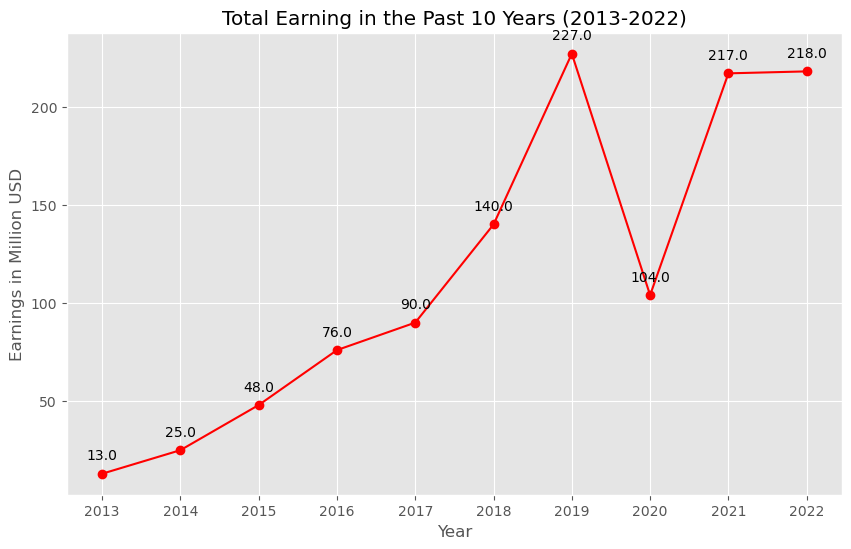

In [24]:
# Filtering the data for earning in the past 10 years
yearly_earnings = df_esports[(df_esports['Earnings'] > 0) &
                             (df_esports['Year'] >= 2013) &
                             (df_esports['Year'] <= 2022)].copy()

# Converting earnings in millions USD
yearly_earnings['Earnings'] = round(yearly_earnings['Earnings']/1000000)
yearly_earnings.reset_index(drop=True, inplace=True)

# Making a line chart
df_line = yearly_earnings.groupby('Year')['Earnings'].sum()
plt.figure(figsize=(10,6))
df_line.plot(kind='line', marker='o', color='red')

# Adding labels
for x, y in zip(df_line.index, df_line.values):
    plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,10), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Total Earning in the Past 10 Years (2013-2022)')
plt.show()

The line graph of Total Earning in the past 10 years (2013-2022) shows that Esports Industry has experienced **growth** and **increase** in earnings each year, which **peaked in 2019 earning a total of $227M** before Pandemic Covid-19. Even though the number of tournaments on pandemic has not decreased drastically, **the earnings during the pandemic has decreased by more than 50%**. <br>

**In 2021, the Esports Industry is recovering** by showing an increase in the tournaments being held and an increase in the amount of earnings which has **increased approximately 100% or 2 times** from the previous year.

### 5. Total Tournament by Genre in the Past 10 Years (2013-2022)
Due to top 3 genres (MOBA, Battle Royale, and FPS) are dominating, let's take a look at the total tournaments for the 3 genres

<Figure size 1800x600 with 0 Axes>

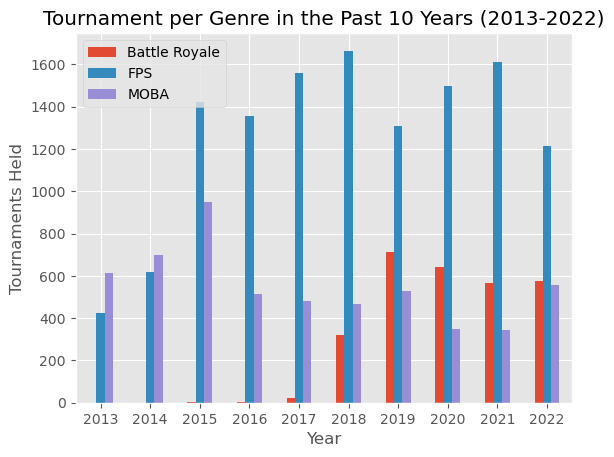

In [25]:
# Filtering the data for top 3 genres
genre_yearly_tournament = df_esports[(df_esports['Tournaments'] > 0) & 
                                     (df_esports['Year'] >= 2013) &
                                     (df_esports['Year'] <= 2022) &
                                     (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_tournament = genre_yearly_tournament.groupby(['Genre', 'Year'])['Tournaments'].sum().reset_index()
#unique_genre_yearly_tournament = genre_yearly_tournament['Genre'].unique()

# Pivot the data for clustered bar chart
pivot_table = genre_yearly_tournament.pivot_table(index='Year', columns='Genre', values='Tournaments', fill_value=0)

# Creating the clustered bar chart
plt.figure(figsize=(18, 6))
pivot_table.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Tournament per Genre in the Past 10 Years (2013-2022)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [26]:
print(pivot_table)

Genre  Battle Royale   FPS  MOBA
Year                            
2013               0   426   612
2014               0   619   701
2015               2  1422   950
2016               2  1355   514
2017              22  1561   483
2018             322  1665   468
2019             714  1311   529
2020             643  1496   347
2021             566  1611   342
2022             574  1214   558


Comparing top 3 most popular genre that generating lots of earnings in the past 10 years (2013-2022). From the clustered bar chart we can learn that:
* The bar chart shows that **FPS is dominating tournament held** since 2015, jumping from 619 tournaments held in 2014 to 1422 tournaments held in 2015, which more than **120% increase**.

* In terms of tournament held, **MOBA** doesn't seems to be growing. The **highest peak was in 2015**

* Although Battle Royale is a new genre in the Esports Industry, **Battle Royale** experienced visible **growth in 2018**, which began to increase in popularity, marked by an increase in the number of tournaments **from 22 to 322 tournaments held in just one year**, which is **more than 1300% growth** in terms of tournaments held.

* In 2020, **The Covid-19 Pandemic affected the number of tournaments held** and the lowest was in 2021, **except for FPS**. Whereas, in **2022 MOBA and Battle Royale are experiencing a recovery**, it can be seen from the increasing number of tournaments being held, however **FPS has experienced a decrease** in the number of tournaments held.

### 6. Total Earnings by Genre in the Past 10 Years (2013-2022)
Let's take a look, what genres have generated the most earnings over the last decade

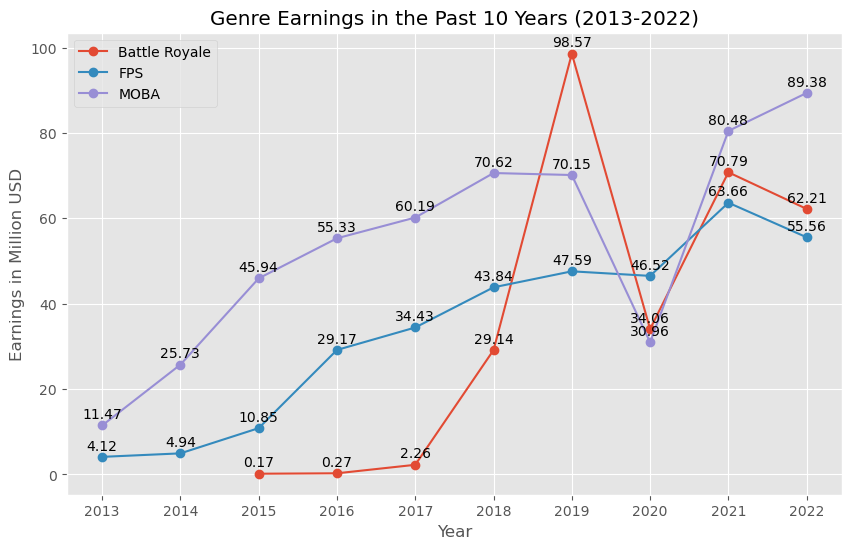

In [27]:
# Filtering the data for top 3 genres
genre_yearly_earnings = df_esports.loc[(df_esports.Earnings > 0) &
                                       (df_esports.Year >= 2013) &
                                       (df_esports.Year <= 2022) &
                                       (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_earnings = genre_yearly_earnings.groupby(['Genre', 'Year'])['Earnings'].sum().reset_index()

# Converting earnings in millions USD
genre_yearly_earnings['Earnings'] = (genre_yearly_earnings['Earnings']/1000000).round(2)
genre_yearly_earnings.reset_index(drop=True, inplace=True)
unique_genre_yearly_earnings = genre_yearly_earnings['Genre'].unique()

# Making a line chart and add labels
plt.figure(figsize=(10,6))  

for Genre in unique_genre_yearly_earnings:
    genre_data = genre_yearly_earnings[genre_yearly_earnings['Genre'] == Genre]
    plt.plot(genre_data['Year'], genre_data['Earnings'], label=Genre, marker='o')
    
    for x,y in zip(genre_data['Year'], genre_data['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Genre Earnings in the Past 10 Years (2013-2022)')
plt.legend()
plt.show()

The line graph of the top 3 genre earnings in the last 10 years (2013-2022) show various trends:
* **Each genre experiencing growth** and looks stable **before pandemic started** affecting earnings in **2020**.

* In contrast to the total tournaments held by genre, in terms of total earnings **MOBAs have dominated** most of year for the last decade, with **fewer tournaments being held than the FPSes**

* In **2019**, there is a **correlation** with the **tournament held and genre earnings**,except for FPS. Battle Royale and MOBA earnings increased as the number of tournaments held increased during this year. 

* In **2020, all genres suffered from a decreased in earnings due to Covid-19 pandemic** and Battle Royale was the genre that experienced the worst decrease in earnings. However, the **number of tournaments held did not experience a significant decrease**. 

### 7. Total Tournaments Held by Games in the Past 10 Years (2013-2022)
Let's breakdown for each games in top 5 games that generating lots of earning. Which games has the most tournaments in the last decade

In [28]:
# Creating filter for top 5 games
top5earnings = topgames['Game'].head(5)
top5earnings

0      Dota 2
1    Fortnite
2       CS:GO
3         LoL
4         AoV
Name: Game, dtype: object

<Figure size 1000x600 with 0 Axes>

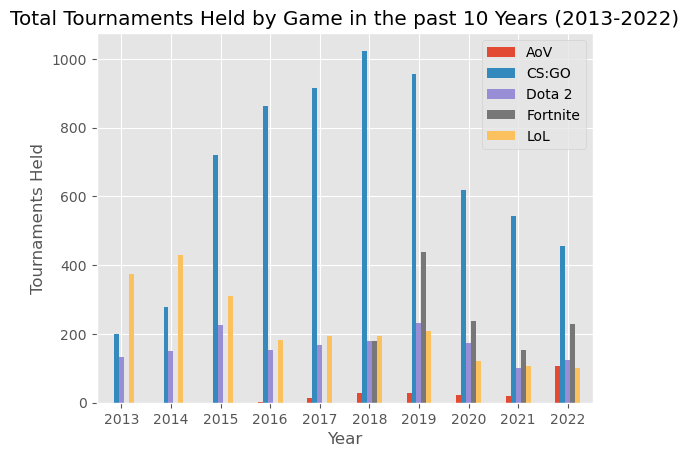

In [29]:
# Creating total games tournaments by year
games_tourney = df_esports.groupby(['Game', 'Year'])['Tournaments'].sum().reset_index().copy()

# Filter and aggregate data for clustered bar chart
topgames_df = df_esports[(df_esports['Game'].isin(top5earnings)) & (df_esports['Year'].between(2013,2022))]
pivot_table = topgames_df.pivot_table(index='Year', columns='Game', values='Tournaments', fill_value=0, aggfunc='sum')

# Creating the Clustered bar chart
plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Total Tournaments Held by Game in the past 10 Years (2013-2022)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [30]:
print(pivot_table)

Game  AoV  CS:GO  Dota 2  Fortnite  LoL
Year                                   
2013    0    199     134         0  375
2014    0    279     150         0  429
2015    0    721     227         0  311
2016    2    863     153         0  182
2017   15    915     167         0  193
2018   29   1024     181       179  194
2019   28    955     232       439  210
2020   22    620     174       237  120
2021   20    542     100       153  107
2022  108    455     124       230  100


Clustered bar chart of total tournaments held by top 5 game earnings in the past 10 years (2013-2022) shows that:
* Most of games on top 5 games are experiencing an **increase and peaked of tournaments held in 2019**, except for CS:GO which in 2018.

* By Analyzing plot **individually**, we can see some interesting things in the chart patterns. The Battle of popularity between LoL and Dota 2. The number of tournaments held in **LoL decreased in 2015** but LoL still had more tournaments before 2019, then **Dota started to overtake in 2019**. And

* According to CS:GO Patterns, **CS:GO is likely starting to lose its popularity** as seen from the **decreasing** number of tournaments held **after the peak in 2018**, Even in 2022, all games are starting to recover from the Covid-19 Pandemic but CS:GO is still experiencing a decreased number of tournaments.

### 8. Total Earnings by Games in the Past 10 Years (2013-2022)
Let's breakdown for each games in top 5 that generating lots of earning in the last decade

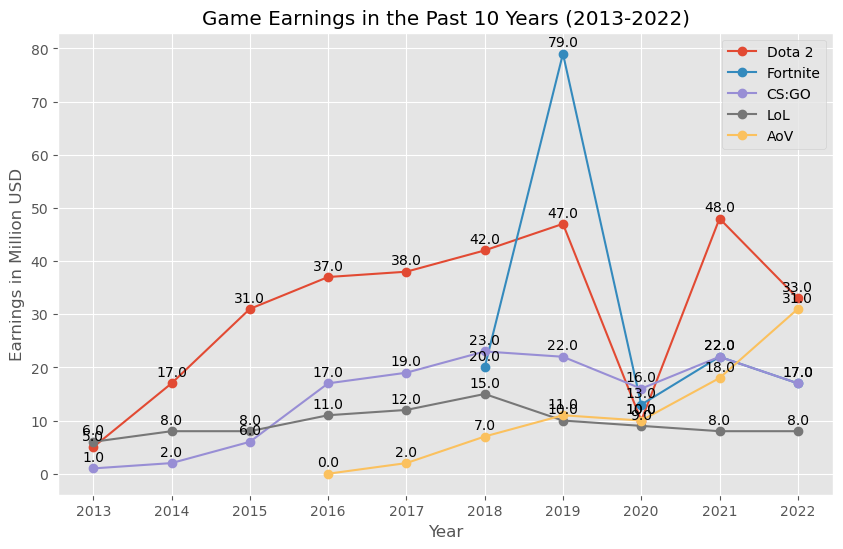

In [31]:
# Creating total games earning by Year and convert it into million USD
games_earning = df_esports.groupby(['Game','Year'])['Earnings'].sum().reset_index()
games_earning['Earnings'] = (games_earning['Earnings']/1000000).round()

# Creating line chart 
plt.figure(figsize=(10,6))

for games in top5earnings:
    games_earning_by_years = games_earning[(games_earning['Game'] == games) & (games_earning['Year'].between(2013,2022))]
    plt.plot(games_earning_by_years['Year'], games_earning_by_years['Earnings'], label = games, marker='o')
    
    for x,y in zip(games_earning_by_years['Year'], games_earning_by_years['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2013,2023)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Game Earnings in the Past 10 Years (2013-2022)')
plt.legend()
plt.show()

The line chart of Game Earnings in the past 10 years (2013-2022) shows that: 
* Most of the games experiencing **growth and peaking in earnings on 2019**.

* In **2020**, most of the games **earnings less money than previous year due to Covid-19**. All tournaments that had large prizepool were cancelled/postponed to the next year. Only AoV has maintained its earnings the same as last year. 

* Altough the number of **tournaments in MOBA is not as much as in FPS** according to the previous chart pattern. **MOBA** still **generates more earnings**, thanks to Dota 2. This pattern was seen in 2014 where earnings from Dota 2 has increased by more than 3 times due to Dota 2 started to implement the unique prizepool system.

* By **analyzing line plot individually**, **Fortnite is the most unstable in terms of earnings**. At the beginning of its appearance **in 2018** Fortnite was able to **generate $20 M** and **increased** almost **4 times in the next year**, but after Covid-19 pandemic Fortnite began to lose its popularity.

* According to the chart patterns, AoV looks very promising. AoV doesn't seem to be struggling from Covid-19 Pandemic and continue to grow in terms of earnings.


## Step 5: Conclussion

* Over the past decade, the Esports Industry has continued to grow and attract worldwide attention.

* Analyzing over the past decade provided insight into the relationship between games, genres, tournaments held, and earnings.

* The data has relevead interesting trends, such as The Covid-19 pandemic has greatly affected earnings in the Esports Industry.